**Name: Mohammad Taslimi**

**Student Number: 99101321**




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [7]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST`
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
X, y = fetch_openml('Fashion-MNIST', version=1, parser='auto', return_X_y=True)
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [8]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets.
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=123)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [9]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)



# Define the classes we are interested in
classes = ['0', '1', '7']

# Convert y_train and y_test to numpy arrays for easier processing
y_train = y_train.to_numpy()

# Get the indices of the samples belonging to the above classes in the training set
indices_train = np.where(np.isin(y_train, classes))[0]

# Keep only the samples of the above classes in the training set
x_train = x_train.iloc[indices_train]
y_train = y_train[indices_train]

x_train = x_train.to_numpy()




#############################
print(x_train.shape, y_train.shape)

(18017, 784) (18017,)


In [10]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)

y_test = y_test.to_numpy()

# Get the indices of the samples belonging to the above classes in the testing set
indices_test = np.where(np.isin(y_test, classes))[0]

# Keep only the samples of the above classes in the testing set
x_test = x_test.iloc[indices_test]
y_test = y_test[indices_test]
x_test = x_test.to_numpy()
#############################

print(x_test.shape, y_test.shape)

(2983, 784) (2983,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [11]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = x
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        grad = self.output * (up_grad - np.sum(self.output * up_grad, axis=1, keepdims=True))
        return grad
        #############################

    def step(self, optimizer):
      pass

### The `Linear` Layer

In [22]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)

        # self.w = np.random.randn(out_dim, in_dim) * 0.01
        # self.b = np.zeros((out_dim, 1))


        self.w = np.random.randn(in_dim, out_dim) * np.sqrt(2. / in_dim)
        self.b = np.zeros((1, out_dim))
        self.inp = None

        #############################
        self.dw = None
        self.db = None
        self.dx = None


    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        z = np.dot(inp, self.w) + self.b
        # z = self.w @ inp + self.b
        #############################

        return z

    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        inp_2d = np.atleast_2d(self.inp)
        self.dw = np.dot(inp_2d.T, up_grad)
        self.db = np.sum(up_grad, axis=0, keepdims=True)
        down_grad = np.dot(up_grad, self.w.T)
        #############################
        return down_grad

    def step(self, optimizer):
      # Update the layer's weights and biases
      # Update previous_w_update and previous_b_update accordingly
      #############################
      # Your code goes here (5 points)
      self.w  = optimizer.get_next_update(self.w, self.dw)
      self.b = optimizer.get_next_update(self.b, self.db)
      #############################

### The `ReLU` Layer

In [13]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        output = np.maximum(0, inp)
        #############################
        return output

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * (self.inp > 0)
        return down_grad

    def step(self, optimizer):
      pass

### The `sigmoid` Layer

In [14]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.out = 1 / (1 + np.exp(-inp))
        #############################
        return self.out

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * self.out * (1 - self.out)
        #############################
        return down_grad

    def step(self, optimizer):
      pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [16]:
class CELoss():
    def __init__(self):
      self.yhat = None
      self.y = None

    def forward(self, pred, target):
        m = pred.shape[0]
        self.yhat = pred
        self.y = target

        # Commpute and return the loss
        #############################
        # Your code goes here (8 points)
        loss = -1/m * np.sum(target * np.log(pred))
        return loss
        #############################


    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0]
        grad = -1/m * (self.y / self.yhat)
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [17]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        x = x - self.lr * dx
        return x
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [18]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers
        self.losses  = []
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        out = inp
        for layer in self.layers:
          out = layer.forward(out)

        return out
        #############################

    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        grad = self.loss_fn.backward()
        for layer in reversed(self.layers):
          grad = layer.backward(grad)
        #############################

    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [19]:
def onehot_enc(y, num_labels):
    y = np.array(y).astype(int)
    ary = np.zeros((y.shape[0], num_labels))
    print(ary.shape)
    for i, val in enumerate(y):
        if val == 7:
          ary[i, 2] = 1
        else:
          ary[i, val] = 1
    return ary

y_train = onehot_enc(y_train, 3)
y_test = onehot_enc(y_test, 3)

(18017, 3)
(2983, 3)


In [45]:
def train(model, epochs, x_train, y_train):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)

      pred = model.forward(x_train) # forward pass
      loss = model.loss(pred, y_train) # compute loss
      model.backward() # backward pass
      model.update() # update parameters
      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [57]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
nn = MLP(
    layers=[
        Linear(784, 50), # Input dimension is 784, output dimension is 50
        RelU(), # Activation function for the first hidden layer
        Linear(50, 50), # Input and output dimension are both 50
        RelU(), # Activation function for the second hidden layer
        Linear(50, 3), # Input dimension is 50, output dimension is 3
        Sigmoid(), # Activation function for the output layer
        SoftMaxLayer() # Softmax layer for the final output
    ],
    loss_fn=CELoss(), # Use cross-entropy loss as the loss function
    optimizer=GradientDescent(lr=0.1) # Use gradient descent as the optimizer with learning rate 0.001
)
#############################

epochs = 50

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)

Loss at 0: 1.136
Loss at 1: 0.986
Loss at 2: 0.861
Loss at 3: 0.805
Loss at 4: 0.771
Loss at 5: 0.746
Loss at 6: 0.726
Loss at 7: 0.709
Loss at 8: 0.695
Loss at 9: 0.683
Loss at 10: 0.672
Loss at 11: 0.664
Loss at 12: 0.656
Loss at 13: 0.650
Loss at 14: 0.644
Loss at 15: 0.640
Loss at 16: 0.635
Loss at 17: 0.631
Loss at 18: 0.628
Loss at 19: 0.625
Loss at 20: 0.622
Loss at 21: 0.620
Loss at 22: 0.617
Loss at 23: 0.615
Loss at 24: 0.613
Loss at 25: 0.612
Loss at 26: 0.610
Loss at 27: 0.608
Loss at 28: 0.607
Loss at 29: 0.606
Loss at 30: 0.604
Loss at 31: 0.603
Loss at 32: 0.602
Loss at 33: 0.601
Loss at 34: 0.600
Loss at 35: 0.599
Loss at 36: 0.598
Loss at 37: 0.598
Loss at 38: 0.597
Loss at 39: 0.596
Loss at 40: 0.595
Loss at 41: 0.595
Loss at 42: 0.594
Loss at 43: 0.594
Loss at 44: 0.593
Loss at 45: 0.592
Loss at 46: 0.592
Loss at 47: 0.591
Loss at 48: 0.591
Loss at 49: 0.590


Let's plot the loss value for each iteration

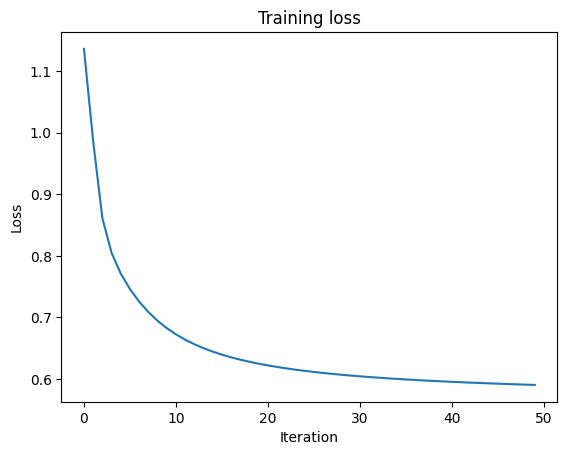

In [58]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [59]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)

# Get the predictions on the testing set
pred = nn.forward(x_test)
# Compare the predictions with the true labels and count the correct matches
correct = np.sum(pred.argmax(1) == y_test.argmax(1))

# Calculate the accuracy score
acc = correct / x_test.shape[0]

#############################

print(acc)

0.9792155548105934
